<a href="https://colab.research.google.com/github/TylerAnastasia/Course_work_ML/blob/main/WW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Функции (развернуть)

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.stats.api as stm

warnings.simplefilter("ignore")
plt.style.use('seaborn')

In [ ]:
units = ['MB', 'Kbps', 'Kbps', '%', 'Kbps', 'ms', 'Kbps', 'ms']

In [ ]:
def distr(data, columns_tech, log_scale = None ):
  """функция для построения графиков распределения по одному датасету"""
  fig, axes = plt.subplots(2, 4, figsize = (20,10))
  fig.tight_layout(h_pad = 5, w_pad = 5)
  i = 0
  for k in range(2):
    for l in range(4):
      if log_scale == True:
        sns.histplot(ax=axes[k][l], data=data[columns_tech[i]]-data[columns_tech[i]].mean(), kde=True, log_scale = log_scale)
      else:
        sns.histplot(ax=axes[k][l], data=data[columns_tech[i]], kde=True, log_scale = log_scale)
      mean = data[columns_tech[i]].mean()
      median = data[columns_tech[i]].median()

      axes[k][l].axvline(mean, color='g', label = ('mean', mean.round()))
      axes[k][l].axvline(median, color='b', label = ('median', median.round()))

      axes[k][l].set_xlabel(units[i])
      axes[k][l].set_title(columns_tech[i], pad = 10)
      axes[k][l].legend()
      i+=1
  return plt.show()

In [ ]:
def pair_distr(data1, data2):
  """функция для построения графиков распределения по двум датасетам для сравнения"""
  fig, axes= plt.subplots(4, 2, figsize = (20,10))  
  ax = axes.ravel()
  fig.tight_layout(h_pad = 5, w_pad = 5)
  for i in range(8):
    _, bins = np.histogram(data1.iloc[:,i], bins = 50)
    ax[i].hist(data1.iloc[:, i], bins = bins, color = 'green', alpha = 0.3)
    ax[i].hist(data2.iloc[:, i], bins = bins, color = 'red', alpha = 0.3)
    ax[i].set_title(data1.columns[i])
    ax[i].set_yticks(())
    ax[0].legend(['довольны', 'не довольны'], loc = 'best')
    ax[i].set_ylabel('кол-во пользователей')
    ax[i].set_xlabel(units[i])

  return plt.show()
  

In [ ]:
def bootstrap(data1, data2, alpha = 0.05, n_samples = 200):
  """функция для bootstrap для поиска p-value"""
  dt1 = []
  dt2 = []
  diff = []
  
  # с помощью случайного выбора формируем новые выборки
  for i in range(10000):
    sample1 = data1.sample(n_samples)   
    sample2 = data2.sample(n_samples) 
    dt1.append(np.mean(sample1))
    dt2.append(np.mean(sample2))
    diff.append(np.mean(sample1) - np.mean(sample2))
  

  # доверительные интервалы
  # stat1 = np.asarray([np.average(dt1[_ids]) for _ids in dt1])
  # stat1.sort(axis=0)
    
  return diff, dt1, dt2

In [ ]:
def distr_plot(data1, data2, diff, title, unit): 
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))
  fig.suptitle(title, y=1.05, fontsize=14)

  sns.distplot(data1, color = 'black', ax = ax[0], kde = True, kde_kws = {"fill":True, "color": 'blue'}, hist = False,  label = 'не довольны')
  sns.distplot(data2, color = 'black', ax = ax[0], kde = True, kde_kws = {"fill":True, "color": 'red'}, hist = False,  label = 'довольны')
  mean1 = np.mean(data1)
  median1 = np.median(data1)
  mean2 = np.mean(data2)
  median2 = np.median(data2)

  # ax[0].axvline(interval1[0], color = 'g', ls = '--')
  # ax[0].axvline(interval1[1], color = 'g', ls = '--')

  ax[0].axvline(mean1, color = 'r', ls = '-')
  ax[0].axvline(median1, color = 'b', ls = '--')
  ax[0].axvline(mean2, color = 'r', ls = '-', label = 'mean')
  ax[0].axvline(median2, color = 'b', ls = '--', label = 'median')
  ax[0].set_ylabel('плотность')
  ax[0].set_title('распределение каждой группы')
  ax[0].set_xlabel(unit)
  ax[0].legend(loc = 'best')

  sns.histplot(diff, color = 'green', ax = ax[1], alpha = 0.3)
  mean3 = np.mean(diff)
  median3 = np.median(diff)
  ax[1].axvline(mean3, color = 'r', ls = '-', label = 'mean')
  ax[1].axvline(median3, color = 'b', ls = '--', label = 'median')
  ax[1].set_ylabel('плотность')
  ax[1].set_title('распределение разницы')
  ax[1].set_xlabel(unit)
  ax[1].legend(loc = 'best')

  return plt.show()


In [ ]:
def bootstrap(data_a, data_b, N=5000, size=200, title=None):
    """Функция бутстрэпа, расчет и отрисовка"""
    
    # Реализация бутстрэпа
    mean_samples_a = []
    mean_samples_b = []
    buf = []
    
    for i in range(N):
        sample_a =  data_a.sample(size)
        mean_samples_a.append(np.mean(sample_a))
        sample_b =  data_b.sample(size)
        mean_samples_b.append(np.mean(sample_b))
        buf.append(np.mean(sample_a)-np.mean(sample_b))
        
    # Инициализация полотна
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(title, y=1.05, fontsize=14)
    
    # Графики распределения по группам А и Б
    sns.histplot(mean_samples_a, alpha=.8, ax=ax[0], kde=True, stat='density')
    sns.histplot(mean_samples_b, color='orange', alpha=.8, ax=ax[0], kde=True, stat='density')
    # Интервалы и медиана
    ax[0].axvline(np.percentile(mean_samples_a, 2.5), linestyle='-', color='r', linewidth=3)
    ax[0].axvline(np.percentile(mean_samples_a, 97.5), linestyle='-', color='r', linewidth=3)
    ax[0].axvline(np.median(mean_samples_a), linestyle='--', color='r', linewidth=3)
    ax[0].axvline(np.percentile(mean_samples_b, 2.5), linestyle='-', color='g', linewidth=3)
    ax[0].axvline(np.percentile(mean_samples_b, 97.5), linestyle='-', color='g', linewidth=3)
    ax[0].axvline(np.median(mean_samples_b), linestyle='--', color='g', linewidth=3)
    ax[0].set_title('Плотность распределения по группам \n с хорошими и плохими оценками', fontsize=14)
    ax[0].set_ylabel('Плотность')
    ax[0].set_xlabel(re.findall(r'\((\S+)\)', title)[0])
    ax[0].legend(['Хорошие','Плохие'])
    
    # График распределения разности по группам А и Б
    sns.histplot(buf, alpha=.8, ax=ax[1], kde=True, stat='density', color='g')
    # Интервалы и медиана
    ax[1].axvline(np.percentile(buf, 2.5), linestyle='-', color='b', linewidth=3)
    ax[1].axvline(np.percentile(buf, 97.5), linestyle='-', color='b', linewidth=3)
    ax[1].axvline(np.median(buf), linestyle='--', color='b', linewidth=3)
    ax[1].set_title('Плотность разницы средних', fontsize=14)
    ax[1].set_ylabel('Плотность')
    ax[1].set_xlabel(re.findall(r'\((\S+)\)', title)[0])
    return plt.show()

## Описание задачи и датасета

В ходе опроса компания «Мегафон» предложила своим клиентам оценить уровень удовлетворённости качеством связи по десятибалльной шкале (где 10 — это «отлично», а 1 — «ужасно»). Если клиент оценивал качество связи на 9 или 10 баллов, опрос заканчивался. Если клиент ставил оценку ниже 9, задавался второй вопрос — о причинах неудовлетворённости качеством связи с предоставленными пронумерованными вариантами ответа. Ответ можно было дать в свободном формате или перечислить номера ответов через запятую. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


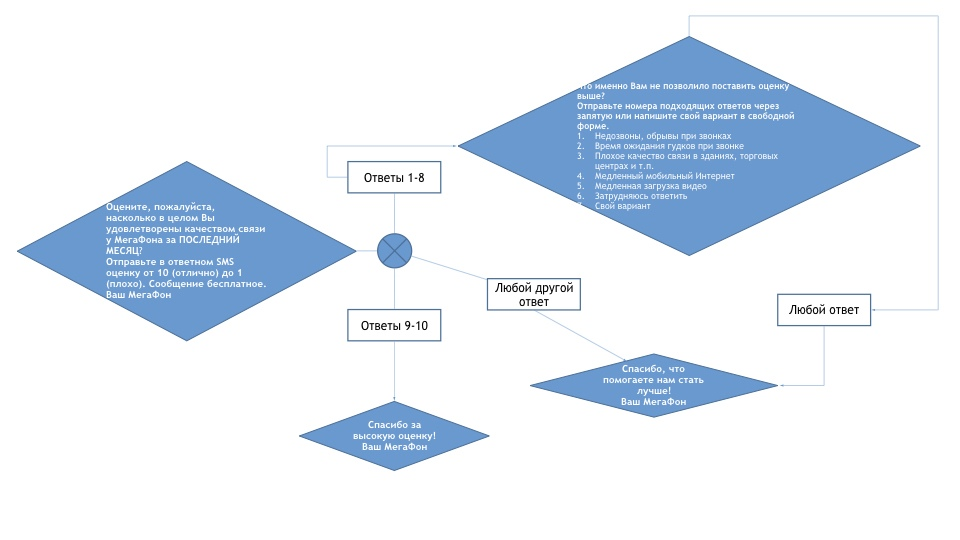

In [ ]:
# Загрузим данные опроса
df = pd.read_csv("/content/drive/MyDrive/course_work_megafon/megafon.csv")

* user_id — идентификатор абонента;
* Q1 — ответ на первый вопрос;
* Q2 — ответ на второй вопрос;
* Total Traffic(MB) — объем трафика передачи данных 1 ;
* Downlink Throughput(Kbps) — средняя скорость «к абоненту» 2 ;
* Uplink Throughput(Kbps)— средняя скорость «от абонента» 3 ;
* Downlink TCP Retransmission Rate(%) — частота переотправок пакетов «к абоненту» 4 ;
* Video Streaming Download Throughput(Kbps) — скорость загрузки потокового видео 5 ;
* Video Streaming xKB Start Delay(ms) — задержка старта воспроизведения видео 6 ;
* Web Page Download Throughput(Kbps) — скорость загрузки web-страниц через браузер 7 ;
* Web Average TCP RTT(ms) — пинг при просмотре web-страниц8 .

In [ ]:
df.head()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68


## Предварительный анализ данных

In [ ]:
# Типы данных
df.dtypes

user_id                                        int64
Q1                                            object
Q2                                            object
Total Traffic(MB)                            float64
Downlink Throughput(Kbps)                    float64
Uplink Throughput(Kbps)                      float64
Downlink TCP Retransmission Rate(%)          float64
Video Streaming Download Throughput(Kbps)    float64
Video Streaming xKB Start Delay(ms)            int64
Web Page Download Throughput(Kbps)           float64
Web Average TCP RTT(ms)                        int64
dtype: object

Целевая переменная - степень удовлетворенности. Если ответ на первый вопрос 9 или 10 = удовлетворен, если меньше 9 - неудовлетворен.

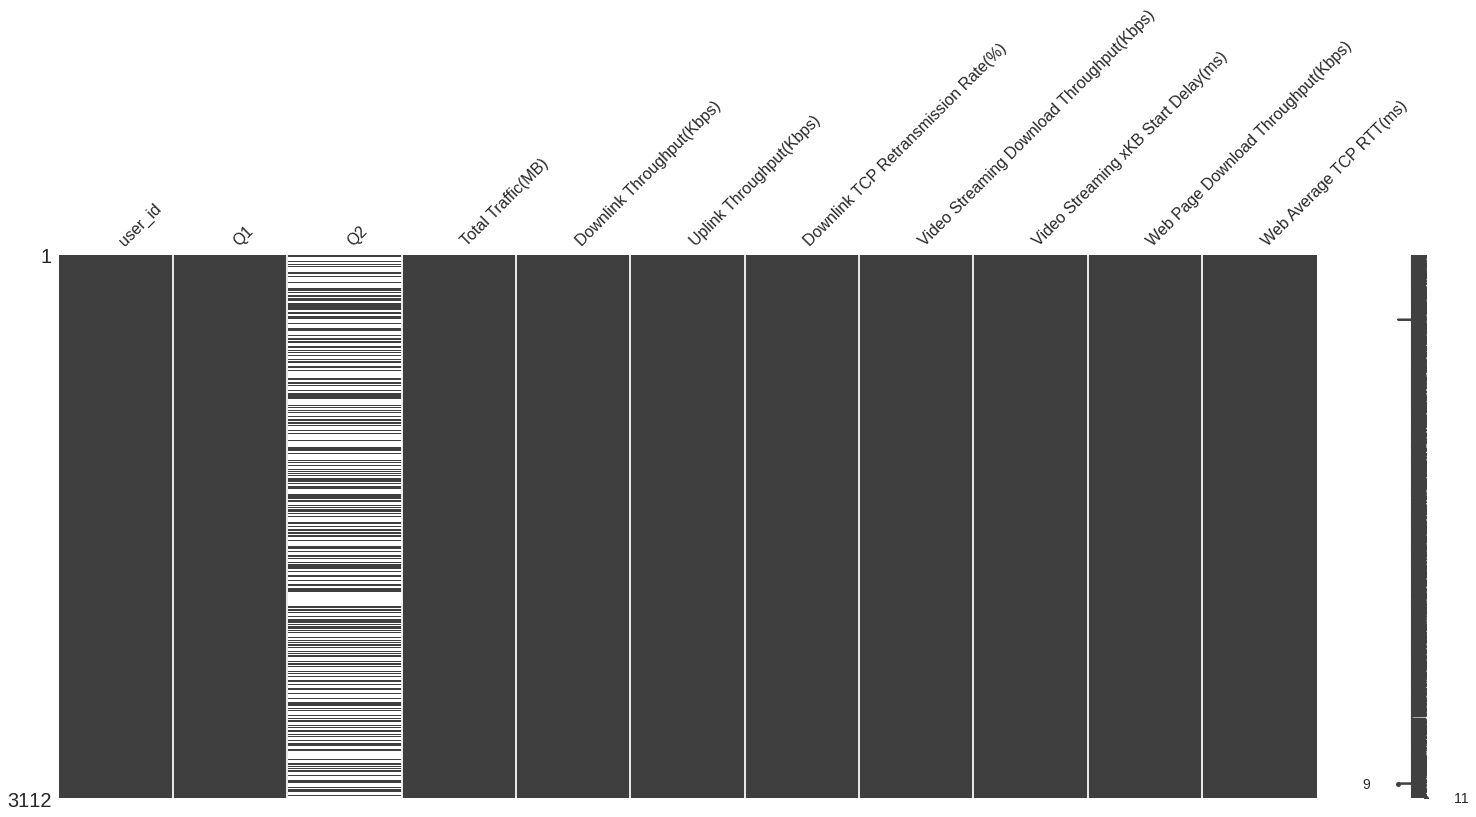

In [ ]:
# Посмотрим на пропущенные значения - закономерно не все ответили на второй вопрос
msno.matrix(df)

In [ ]:
df.isnull().agg('sum')

user_id                                         0
Q1                                              2
Q2                                           1797
Total Traffic(MB)                               0
Downlink Throughput(Kbps)                       0
Uplink Throughput(Kbps)                         0
Downlink TCP Retransmission Rate(%)             0
Video Streaming Download Throughput(Kbps)       0
Video Streaming xKB Start Delay(ms)             0
Web Page Download Throughput(Kbps)              0
Web Average TCP RTT(ms)                         0
dtype: int64

# Пре - Обработка данных 

В Ответах на первый вопрос есть не шаблонные ответы, больше одного числа, текст. 

In [ ]:
# Посмотрим что в ответах на первый вопрос. Шаблон - число от 1 до 10
df.Q1.unique()

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '11', '6', '2, 9',
       '0', '1, 3', '19', '15', nan, '1, 6', '***** ** ***',
       '3 - дер.Ширяево Волоколамского района, 9 - в Москве', '10, 9',
       'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !',
       'ОЦЕНКА-3/НЕВАЖНО/', 'Отвратительно',
       'Я ценой услуг не удовлетворен', 'Пока не понял', '3, 9', '5, 6',
       '0, 1, 5', '5, 7', 'Hi',
       '4. Тульская область Заокский район. Романовские дачи связи почти нет',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю',
       '10, 50',
       'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555', '?',
       'Поохое',
       'Когда в Москве-10 а когда в калужской области в деревне Бели-1',
       'Нет', 'Да', 'Ужасно',
       '3 тройка, связь отвратительная, жалко платить за такой тарив',
       'Чдтчдтччдтччч', '3, 7', '20, 89031081392', '1, 8', 'Без з',
       '10, 5', '2, 5',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном с

In [ ]:
# Находим ответы, которые не соответсвуют формату "одно число" от 1 до 10 и удаляем остальное
df.Q1=df.Q1.str.strip()   
df['Q1'] = df['Q1'].str.replace(r"\D", "", regex=True)

In [ ]:
# Удалим NA и числа вне диапазона по заданному критерию в опросе
df['Q1'] = pd.to_numeric(df['Q1'])
df = df[(df['Q1'] >= 1) & (df['Q1'] <=10)]
df = df.dropna(axis='index', how='any', subset=['Q1']) 
df.Q1 = df.Q1.astype(int)

In [ ]:
# Добавим новый столбец, чтобы интерпретировать ответ на первый вопрос по двум группам- выше 8 и ниже
df['Q1_new'] = 0
df.loc[(df.Q1 > 8), 'Q1_new'] = 1

# 1 - клиент доволен качеством
# 0 - клиент не доволен качеством

In [ ]:
# столбец Q2- ответы на вторую часть опроса - посмотрим какие ответы есть
df.Q2.unique()
# Нужно убрать значения с некорректными ответами, двузначные больше 7(по условию было 6 вариантов или свой 7) и с нулем вначале.
# Суммарно их немного, поэтому можно опустить

array([nan, '4', '3', '2, 3, 4', '4, 5', '1, 3, 4', '1, 3, 4, 5', '1, 3',
       '3, 4', '1, 2', '3, 5', '1', '7', '1, 4', '1, 2, 3, 4, 5', '2, 3',
       '1, 2, 3, 4', '2, 3, 4, 5', '3, 4, 5', '1, 2, 5', '1, 5',
       '1, 2, 4', '6', '1, 4, 5', '1, 2, 3', '2, 5', '2, 4, 5', '1, 2, 7',
       '5', '2', '1, 2, 3, 4, 5, 6', '0, 1, 7', '4, 7', '1, 4, 7', '0, 3',
       '1, 3, 4, 5, 7', '3, 7', '1, 3, 4, 7', '3, 4, 5, 7', '2, 4',
       '5, 6', '1, 2, 3, 5', '1, 3, 5', '1, 2, 34', '1, 2, 4, 5',
       '0, 05, 2, 27, 7', '1, 3, 7', '3, 4, 7', '1, 2, 3, 4, 7', '10',
       '0', '1, 2, 3, 7'], dtype=object)

In [ ]:
answers = []
df['Q2_new'] = 0
count = 0
for i in df['Q2']:
    c = []
    if pd.isnull(i):
        answers.append(0) 
        count += 1
    else:
        a = i.split(',')
        for j in a:
            b = pd.to_numeric(j.strip())
            if (b >= 1) and (b <= 7):
                c.append(b)
        answers.append(c)
        
# Количество нулей во втором вопросе (включая клиентов, удовлетворенных качеством = 1085). = 1747
print(count)   

1747


In [ ]:
df['Q2_new'] = answers

In [ ]:
# Получили датафрейм с отформатированными ответами на опрос в двух последних новых колонках
df.head()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),Q1_new,Q2_new
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83,0,0
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,0,[4]
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,0,[4]
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,0,[3]
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,0,"[2, 3, 4]"


In [ ]:
df.shape

(3062, 13)

# Рассмотрим распределение технических принаков

In [ ]:
columns_tech = df.columns[3:-2]
columns_tech

Index(['Total Traffic(MB)', 'Downlink Throughput(Kbps)',
       'Uplink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)',
       'Video Streaming Download Throughput(Kbps)',
       'Video Streaming xKB Start Delay(ms)',
       'Web Page Download Throughput(Kbps)', 'Web Average TCP RTT(ms)'],
      dtype='object')

In [ ]:
df_tech = df.iloc[:,3:-2]
# Посмотрим на точечные оценки по техническим характеристикам
df_tech.describe()

,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
count,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000
mean,405.957924,2215.220392,170.917038,1.837498,5733.980604,2111.878511,2097.206123,194.295232
std,220.611570,2618.008483,205.115515,2.067945,5160.763798,1590.057498,2048.851459,268.718759
min,100.026680,13.260000,6.110000,0.050000,0.000000,239.000000,0.000000,0.000000
25%,213.330472,653.772500,70.447500,0.720000,2323.080000,1286.000000,1018.190000,74.000000
50%,363.753705,1404.230000,119.425000,1.300000,4434.310000,1673.000000,1671.240000,118.000000
75%,573.063177,2822.512500,210.677500,2.250000,7618.285000,2312.000000,2518.262500,206.000000
max,887.078270,39817.640000,4141.850000,31.200000,58566.030000,21392.000000,35603.970000,3471.000000


In [ ]:
for i in columns_tech:
  print("----", i, "----")
  print("Коэффициэнт ассиметрии:", kurtosis(df[i]))
  print("Коэффициэнт эксцесса:", skew(df[i]))
  print("Мода для ", i, ":", (df[i].value_counts().nlargest(1)))
  print("Медиана для:", (df[i].median()))
  print("Среднее для:", (df[i].mean()))
  print("---------------------------------------------------", '\n')

---- Total Traffic(MB) ----
Коэффициэнт ассиметрии: -0.9414995760342615
Коэффициэнт эксцесса: 0.46588414327580796
Мода для  Total Traffic(MB) : 775.48846    1
Name: Total Traffic(MB), dtype: int64
Медиана для: 363.75370499999997
Среднее для: 405.9579242325277
--------------------------------------------------- 

---- Downlink Throughput(Kbps) ----
Коэффициэнт ассиметрии: 34.14906981002958
Коэффициэнт эксцесса: 4.125887815759927
Мода для  Downlink Throughput(Kbps) : 207.94    2
Name: Downlink Throughput(Kbps), dtype: int64
Медиана для: 1404.23
Среднее для: 2215.2203919007184
--------------------------------------------------- 

---- Uplink Throughput(Kbps) ----
Коэффициэнт ассиметрии: 112.58937457070839
Коэффициэнт эксцесса: 7.953271842126949
Мода для  Uplink Throughput(Kbps) : 140.46    3
Name: Uplink Throughput(Kbps), dtype: int64
Медиана для: 119.42500000000001
Среднее для: 170.9170378837361
--------------------------------------------------- 

---- Downlink TCP Retransmission Rate(%

Распределение технических характеристик не нормальное, с сильной ассиметрией и эксцессом.

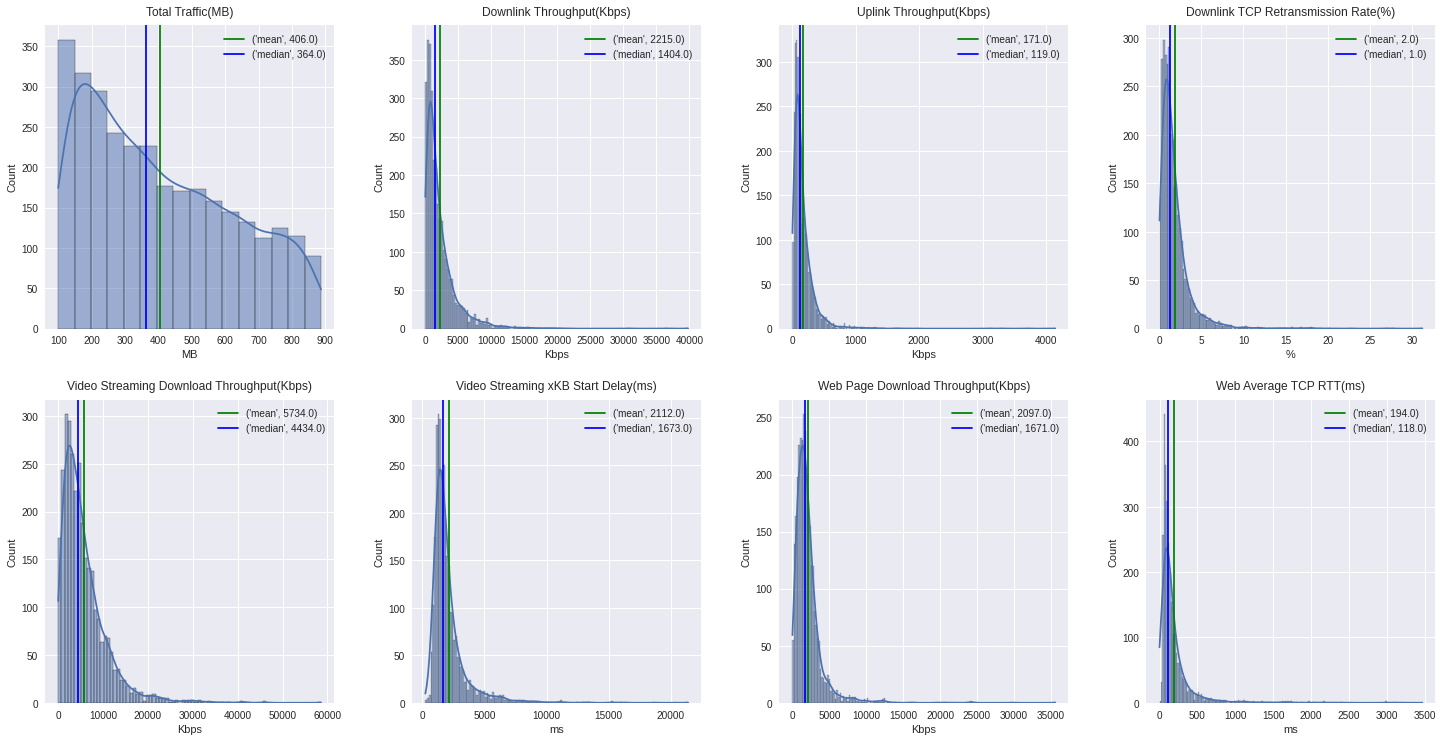

In [ ]:
distr(df, columns_tech)

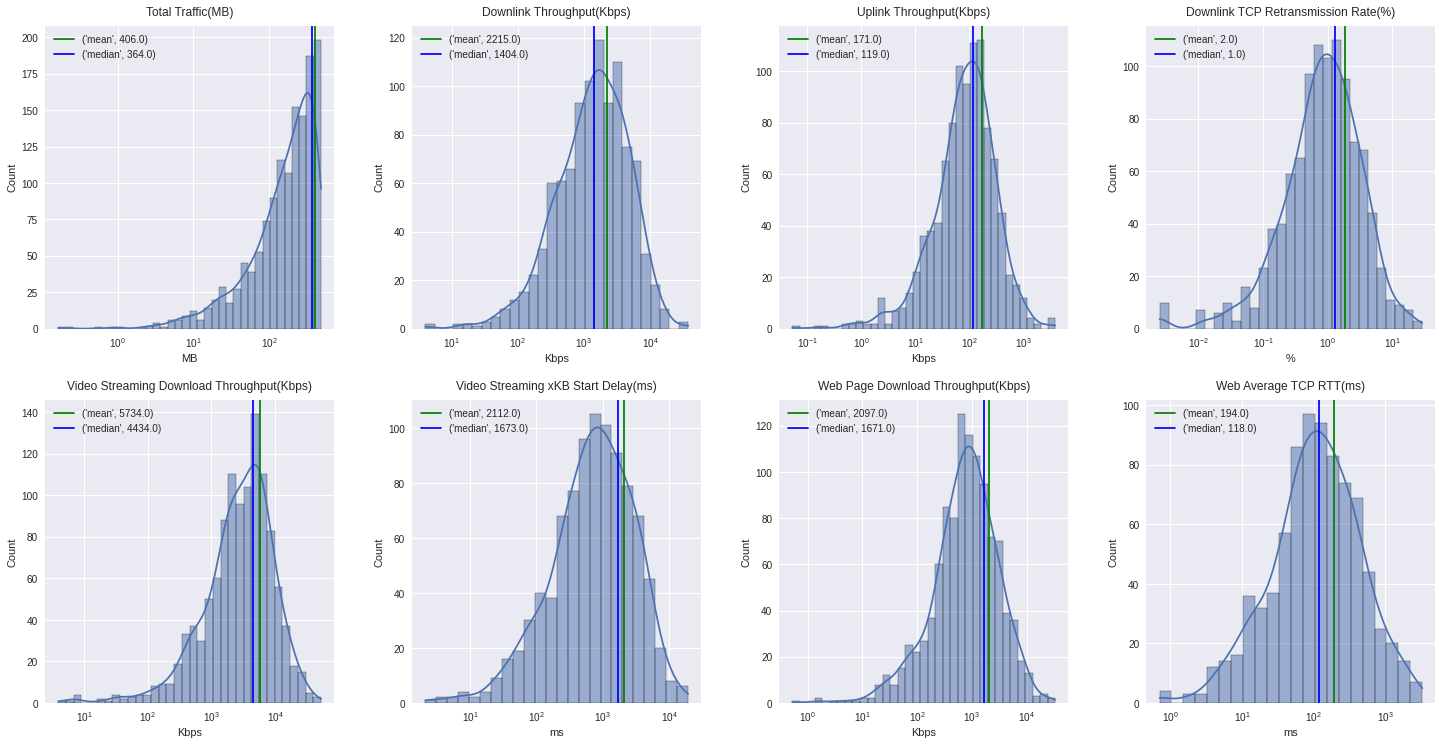

In [ ]:
# Чтобы убрать ассиметрию, применим трансформацию с помощью логарифмирования
distr(df, columns_tech, log_scale = True)


In [ ]:
# 
for i in columns_tech:
  true_params = pareto.fit(df[i])
  low_ci, up_ci = bootstrap_ci(df[i], pareto.fit, n_samples=1000)
  print('Характеристика ', i, 'с вероятностью 0.95 попадает в интервал [', low_ci[0], ',',  up_ci[0], ']')

Характеристика  Total Traffic(MB) с вероятностью 0.95 попадает в интервал [ 0.7979457577505844 , 0.8257796993568489 ]
Характеристика  Downlink Throughput(Kbps) с вероятностью 0.95 попадает в интервал [ 0.2166279409813647 , 0.24152296536064743 ]
Характеристика  Uplink Throughput(Kbps) с вероятностью 0.95 попадает в интервал [ 0.3320549345374524 , 0.40236091761499515 ]
Характеристика  Downlink TCP Retransmission Rate(%) с вероятностью 0.95 попадает в интервал [ 1.1928166347284082 , 30.659686909847842 ]
Характеристика  Video Streaming Download Throughput(Kbps) с вероятностью 0.95 попадает в интервал [ 0.12768712306962837 , 3.6303393717260377 ]
Характеристика  Video Streaming xKB Start Delay(ms) с вероятностью 0.95 попадает в интервал [ 0.4899423551995183 , 0.6615961505335952 ]
Характеристика  Web Page Download Throughput(Kbps) с вероятностью 0.95 попадает в интервал [ 0.13114876255352875 , 866276.9524931074 ]
Характеристика  Web Average TCP RTT(ms) с вероятностью 0.95 попадает в интервал 

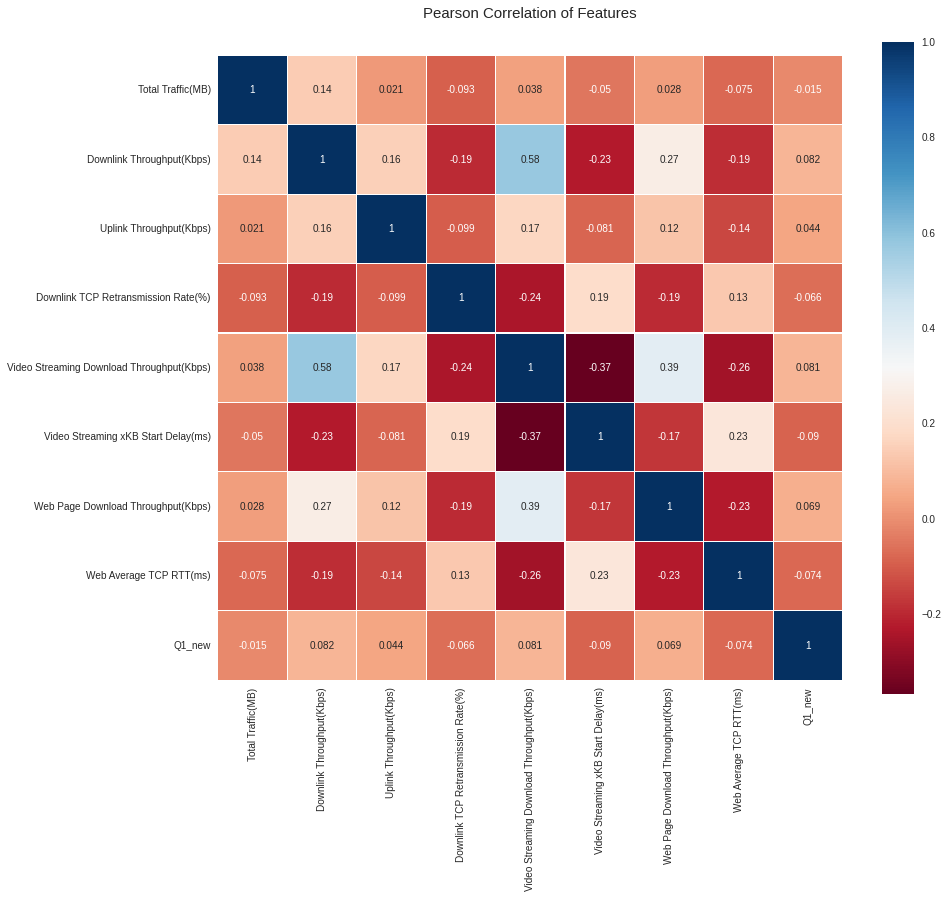

In [ ]:
# Построим тепловую карту и посмотрим на наличие линейной корреляции между техническими характеристиками
df_for_correlation = df.drop(['user_id', 'Q1', 'Q2', 'Q2_new'], axis=1)
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_for_correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

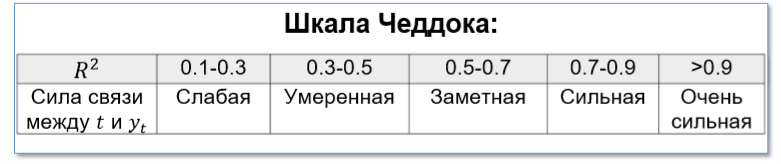

По тепловой карте видно, что есть заметная корреляция между Video Streaming Download Throughput(Kbps) — скорость загрузки потокового видео и Downlink Throughput(Kbps) — средняя скорость «к абоненту». 

Есть умеренная корреляция между Video Streaming Download Throughput(Kbps) — скорость загрузки потокового видео и Web Page Download Throughput(Kbps) — скорость загрузки web-страниц через браузер

Также слабая обратная корреляция между Video Streaming xKB Start Delay(ms) — задержка старта воспроизведения видео и Video Streaming Download Throughput(Kbps)


***Возможно улучшив Downlink Throughput(Kbps) — средняя скорость «к абоненту» улучшатся и другие три характеристики.***

In [ ]:
df_for_correlation = df_for_correlation.astype(float).corr()

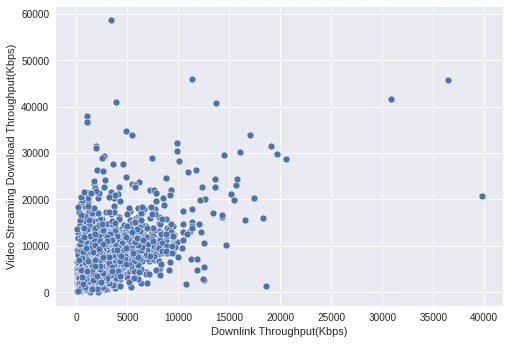

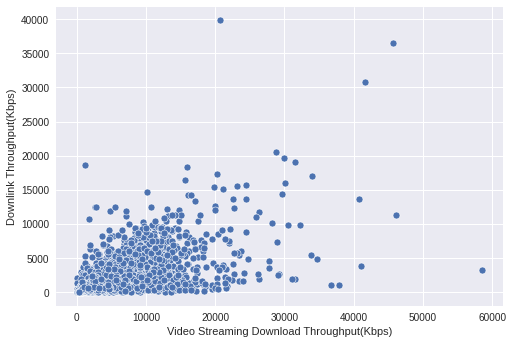

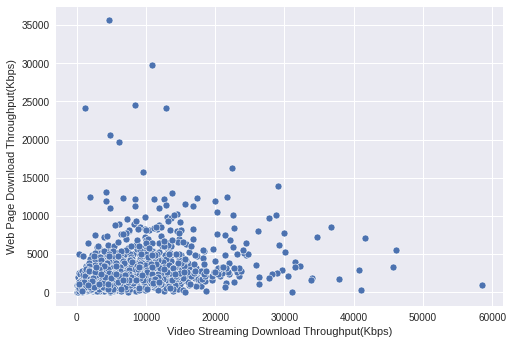

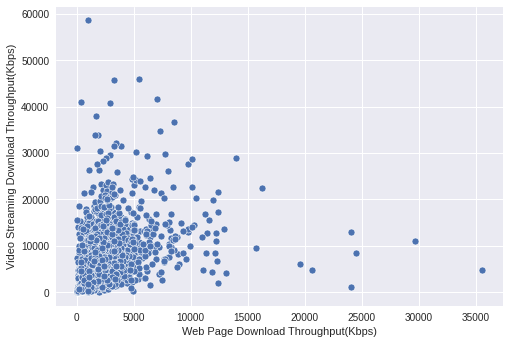

In [ ]:
# Построим диаграммы рассеяния для данных вхаимосвязей и посмотрим есть ли нелинейная корреляция 

level = 0.3

for i in range(9):
  for j in range(9):
    corr = df_for_correlation.iloc[i,j]
    col = df_for_correlation.columns[i]
    row = df_for_correlation.columns[j]
    if (corr > level)&(i!=j):
      sns.scatterplot(x = df[col], y = df[row])
      plt.show()

На диаграмме рассеяния также заметна корреляция между Download Throughput(Kbps) — скорость загрузки web-страниц через браузер и Video Streaming Download Throughput(Kbps) и Web Page Download Throughput(Kbps).

Чем выше скорость загрузки web-страниц через браузер тем выше  скорость загрузки потокового видео и скорость загрузки web-страниц через браузер

## Распределение оценки на первый вопрос

In [ ]:
# Клиенты, которые удовлетворены качеством (На основании оценки за первый вопрос)
df1 = df[(df['Q1'] == 9)|(df['Q1'] == 10)]
print('Процент клиентов которые довольны качеством', len(df1)/len(df))

Процент клиентов которые довольны качеством 0.35434356629653824


Визуализирую распределение ответов на первый вопрос. Дабавляю медианное и среднее для сравнения.

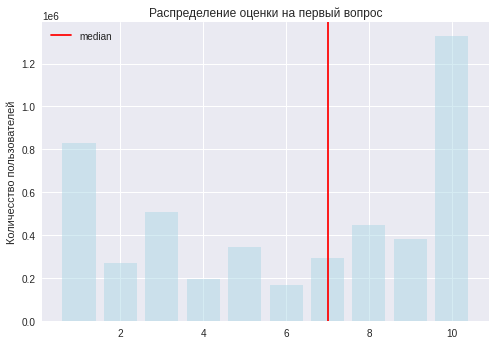

In [ ]:
df.Q1 = df.Q1.astype(int)
df3 = df[['Q1','user_id',]].groupby('Q1').agg('sum')

fig, ax = plt.subplots()
ax.bar(df3.index, df3.user_id, color = 'lightblue', alpha = 0.5)
ax.set_title('Распределение оценки на первый вопрос')
ax.set_ylabel('Количесство пользователей')
ax.axvline(df['Q1'].median(), color = 'red', label = 'median')
ax.legend()
plt.show() 

По графику видно что бoльшая часть пользователей удовлетворены услугами.
Можно рассмотреть группы пользоватлей, поставивших 1 и 3, потому что эти группы численно выделяются в отрицательных отзывах.

Средняя оценка ~ 6

Медианная оценка ~ 7

### Как распределены оценки на первый вопрос у тех пользователей, кто не ответил на второй вопрос

In [ ]:
# Клиенты, которые не удовлетворены качеством, но не уточнили причину(не ответила на второй вопрос)
df2 = df[(df['Q1_new'] == 0 )&(df['Q2'].isnull())]
print('Процент клиентов которые не довольны качеством и не уточнили причину', len(df2)/len(df))


Процент клиентов которые не довольны качеством и не уточнили причину 0.2161985630306989


In [ ]:
# Клиенты, которые не удовлетворены качеством и уточнили причину.
df3 = df[(df['Q1_new'] == 0 )&(df['Q2'].notnull())]
print('Процент клиентов которые не довольны качеством и уточнили причину', len(df3)/len(df))

Процент клиентов которые не довольны качеством и уточнили причину 0.4294578706727629


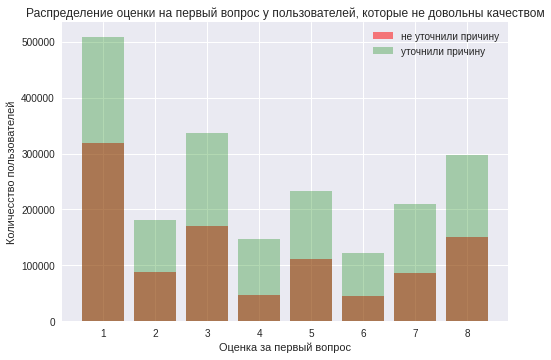

In [ ]:
df2_2 = df2[['Q1','user_id',]].groupby('Q1').agg('sum')
df3_2 = df3[['Q1','user_id',]].groupby('Q1').agg('sum')

fig, ax = plt.subplots()
ax.bar(df2_2.index, df2_2.user_id, color = 'red', alpha = 0.5, label = 'не уточнили причину')
ax.bar(df3_2.index, df3_2.user_id, color = 'green', alpha = 0.3, label = 'уточнили причину')
ax.set_title('Распределение оценки на первый вопрос у пользователей, которые не довольны качеством')
ax.set_ylabel('Количесство пользователей')
ax.set_xlabel('Оценка за первый вопрос')
plt.legend()
plt.show() 

По графикам видно, что распределение одинаково. 
Среди клиентов, не ответивших на второй вопрос также оценки 1 и 3- самые популярные.

## Распределение технических призаков по разным группам (на основе ответов на первый вопрос)

### 1. Группа недовольных качеством (ниже 9) и довольных качеством (оценки 9 и 10 на первый вопрос)

In [ ]:
df1 = df.iloc[:, 3:-1]
satisfied = df1[df1['Q1_new'] == 1].iloc[:,:-1]
non_satisfied = df1[df1['Q1_new'] == 0].iloc[:,:-1]

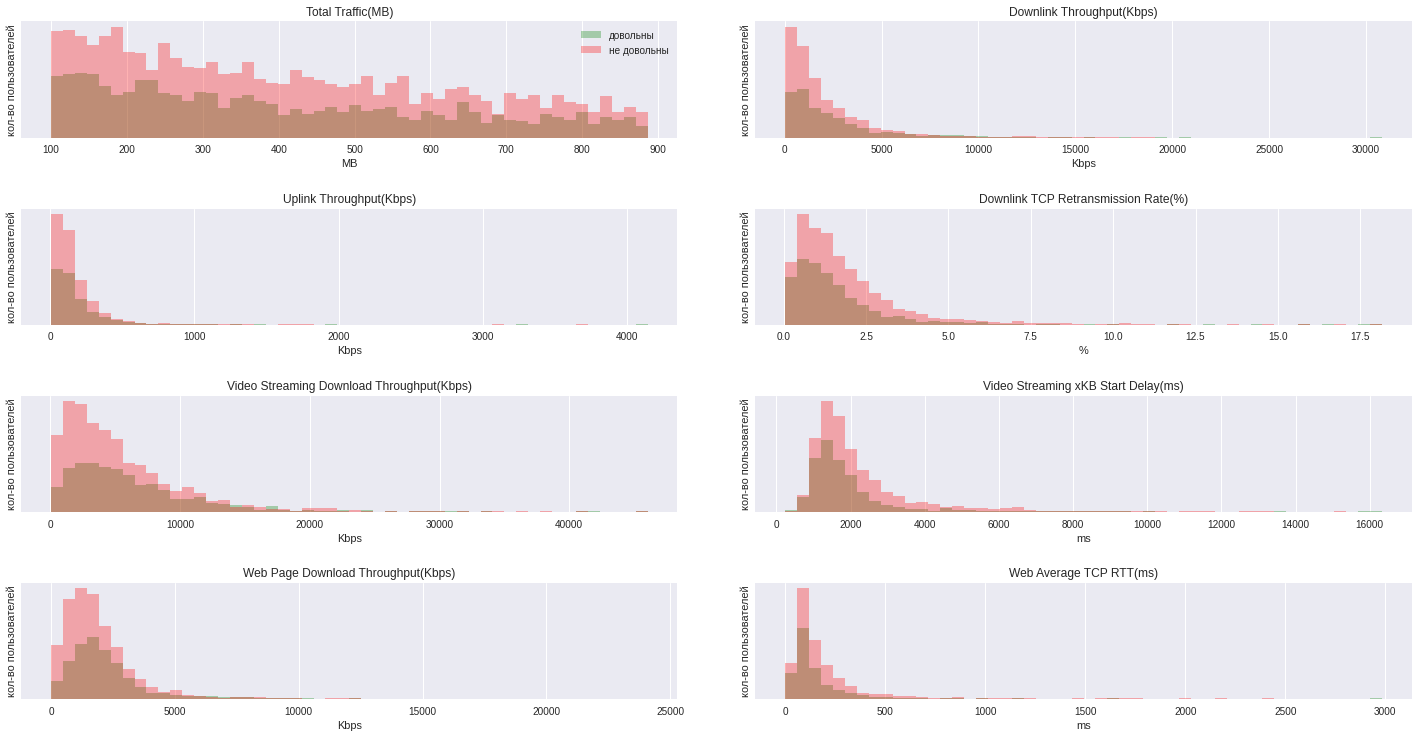

In [ ]:
pair_distr(satisfied, non_satisfied)

Видно наибольшую разницу в распределении с учетом разницы в количестве пользователей **Video Streaming Download Throughput(Kbps) — скорость загрузки потокового видео и Downlink Throughput(Kbps)— средняя скорость «к абоненту»** для групп клиентов, не довольных качеством (оценки 1 - 8) и довольных качеством (оценки 9-10) на основании первого вопроса.

### Статистические гипотезы:

*   Техническая характеристика Video Streaming Download Throuhout отличеется у пользователей, поставивших < 9 за первый вопрос и у пользователей, поставивших 9 и 10.
*   Техническая характеристика Downlink Throughput(Kbps) отличеется у пользователей, поставивших < 9 за первый вопрос и у пользователей, поставивших 9 и 10.

### 2. Группа с оценками 1 и 3 (наиболее популярные оценки за первый вопрос среди не довольных качеством) и группа с оценками 9 и 10 за первый вопрос (довольные).

In [ ]:
df_negative = df[(df['Q1'] == 1) | (df['Q1'] == 3)].iloc[:, 3:-2]
satisfied = df[df['Q1_new'] == 1].iloc[:,3:-2]

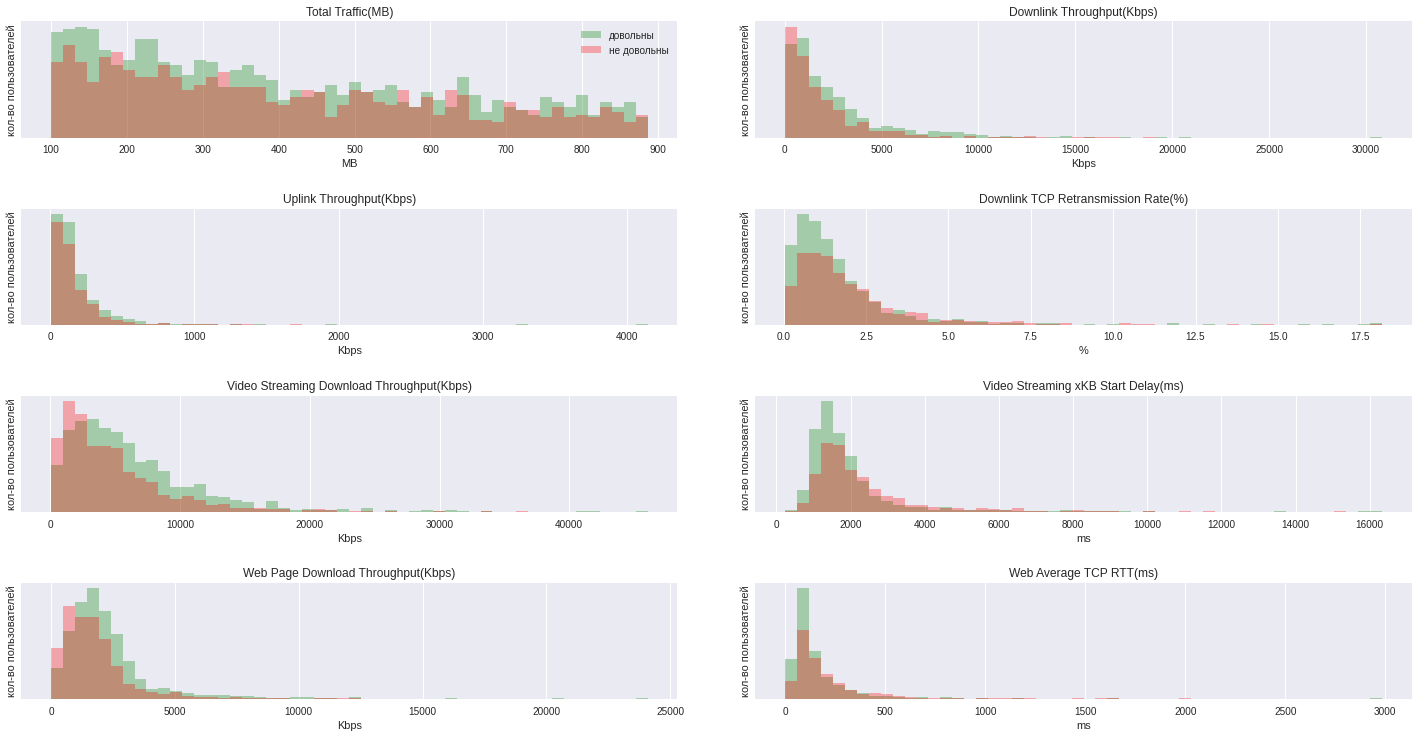

In [ ]:
pair_distr(satisfied, df_negative)

Есть небольшие различие в распределении по показателям **Video Streaming Download Throughput(Kbps) — скорость загрузки потокового видео, Web Page Download Throughput(Kbps) — скорость загрузки web-страниц через браузер и Downlink Throughput(Kbps)— средняя скорость «к абоненту».**У группы недовольных качеством большее количество клиентов с показателем 1-100 по данным характеристикам. Т.е. в самом нижнем диапазоне.

### Статистические гипотезы:
* Техническая характеристика Video Streaming Download Throuhout отличается у пользователей, поставивших 1 и 3 за первый вопрос и у пользователей, поставивших 9 и 10.
* Техническая характеристика Web Page Download Throughput отличается у пользователей, поставивших 1 и 3 за первый вопрос и у пользователей, поставивших 9 и 10.
* Техническая характеристика Downlink Throughput(Kbps) отличается у пользователей, поставивших 1 и 3 за первый вопрос и у пользователей, поставивших 9 и 10.

3. Группа с оценкой 8 и группа с оценкой 9 за первый вопрос.
Если ориентироваться на описание, что оценка 9 и 10 = довольны качеством, то группа с оценкой 8 очень близка к довольным.
Как можно было бы улучшить обслуживание для данных клиентов, чтобы они подняли оценку? Возможно легче всего улучшить общую оценку, обратив внимание именно на эту группу в первую очередь.
Тогда общая оценка удовлетворенности вырастет. 

In [ ]:
non_satisfied = df[df['Q1'] == 8].iloc[:,3:-2]
satisfied = df[df['Q1'] == 9].iloc[:,3:-2]

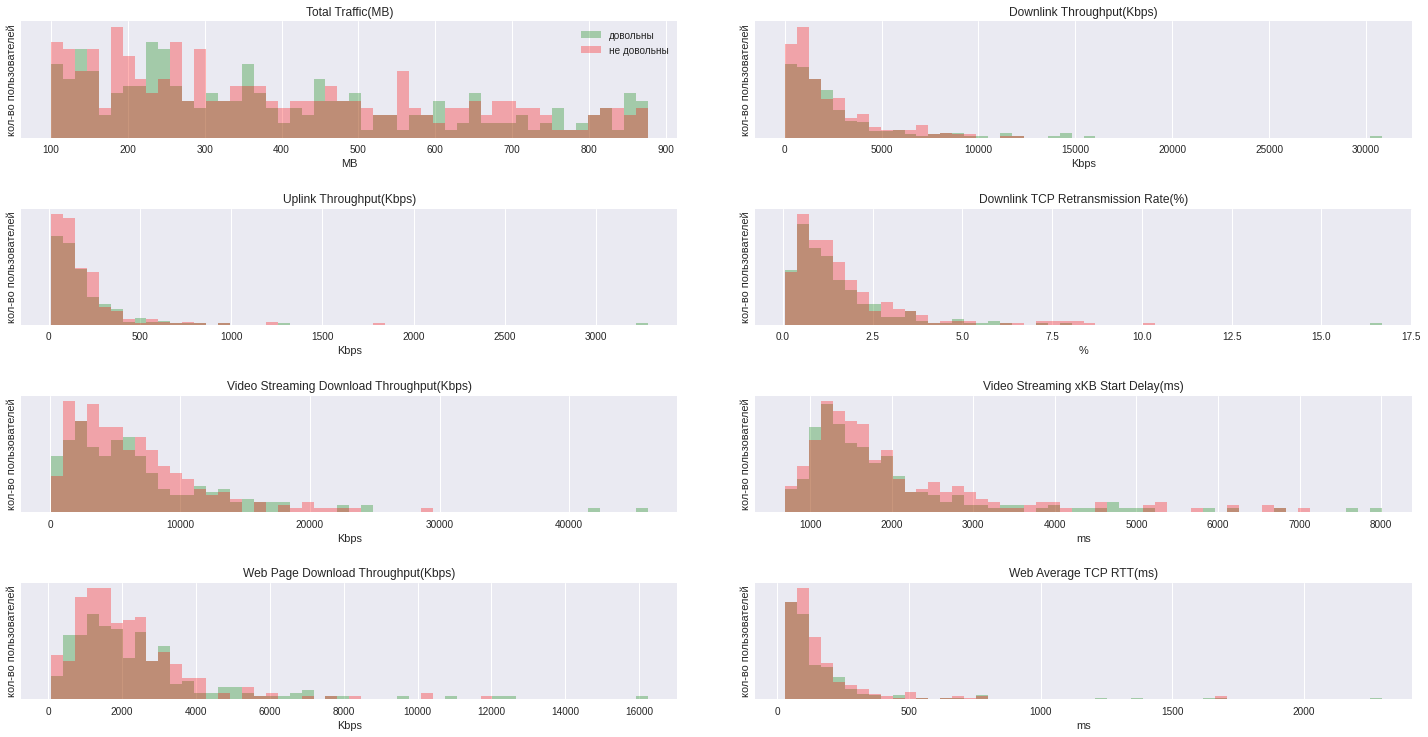

In [ ]:
pair_distr(satisfied, non_satisfied)

### Статистические гипотезы:
* Техническая характеристика Video Streaming Download Throuhout отличaется у пользователей, поставивших 8 за первый вопрос и у пользователей, поставивших 9.
* Техническая характеристика Web Page Download Throughput отличaется у пользователей, поставивших 8 за первый вопрос и у пользователей, поставивших 9.

# Проверка статистических гипотез по разнице распределения на основе ответов на первый вопрос

Для проверки гипотез будем использовать статистического критерий (тест).
В качестве статистики возьмем среднее (мера, которая
показывает, насколько велика разница в конверсии с учетом разброса значений в
нашей выборке).
Для генерации выборок выбранных групп используем алгоритм бутстреп.

**Гипотеза 1.**Техническая характеристика Video Streaming Download Throuhout отличеется у пользователей, поставивших < 9 за первый вопрос и у пользователей, поставивших 9 и 10.

In [ ]:
data1=df[df['Q1_new'] == 0]['Video Streaming Download Throughput(Kbps)']
data2=df[df['Q1_new'] == 1]['Video Streaming Download Throughput(Kbps)']

In [ ]:
diff, dt1, dt2 = bootstrap(data1, data2)

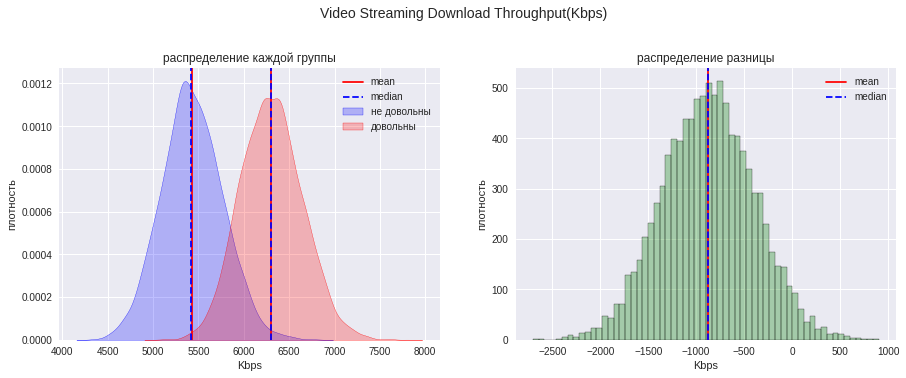

In [ ]:
distr_plot(dt1, dt2, diff, 'Video Streaming Download Throughput(Kbps)', 'Kbps')

На основе имеющихся данных отвергаем нулевую гипотезу. С учетом сильного разброса значений, средняя двух групп отличается значительно. Соответственно характеристика **Video Streaming Download Throughput(Kbps)** для двух групп (поставивших < 9 за первый вопрос и у пользователей, поставивших 9 и 10) отличается.

**Гипотеза 2.**Техническая характеристика Downlink Throughput(Kbps) отличается у пользователей, поставивших < 9 за первый вопрос и у пользователей, поставивших 9 и 10.

In [ ]:
data1=df[df['Q1_new'] == 0]['Downlink Throughput(Kbps)']
data2=df[df['Q1_new'] == 1]['Downlink Throughput(Kbps)']

In [ ]:
diff, dt1, dt2 = bootstrap(data1, data2)

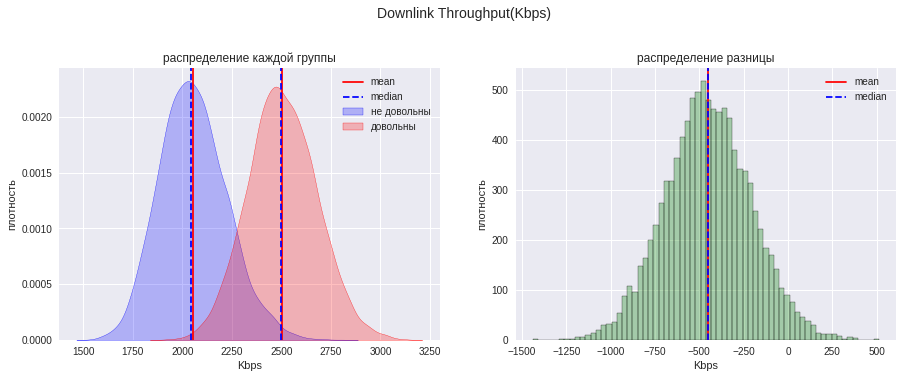

In [ ]:
distr_plot(dt1, dt2, diff, 'Downlink Throughput(Kbps)', 'Kbps')

На основе имеющихся данных отвергаем нулевую гипотезу. С учетом малого разброса значений, средняя двух групп не отличается. Соответственно характеристика **Downlink Throughput(Kbps)** для двух групп (поставивших < 9 за первый вопрос и у пользователей, поставивших 9 и 10) отличается.

**Гипотеза 3.** В качестве нулевой гепотезы примем что техническая характеристика Video Streaming Download Throuhout не отличается у пользователей, поставивших 1 и 3 за первый вопрос и у пользователей, поставивших 9 и 10.

In [ ]:
data1=df[(df['Q1'] == 1)|(df['Q1'] == 3)]['Video Streaming Download Throughput(Kbps)']
data2=df[(df['Q1'] == 9)|(df['Q1'] == 10)]['Video Streaming Download Throughput(Kbps)']

In [ ]:
diff, dt1, dt2 = bootstrap(data1, data2)

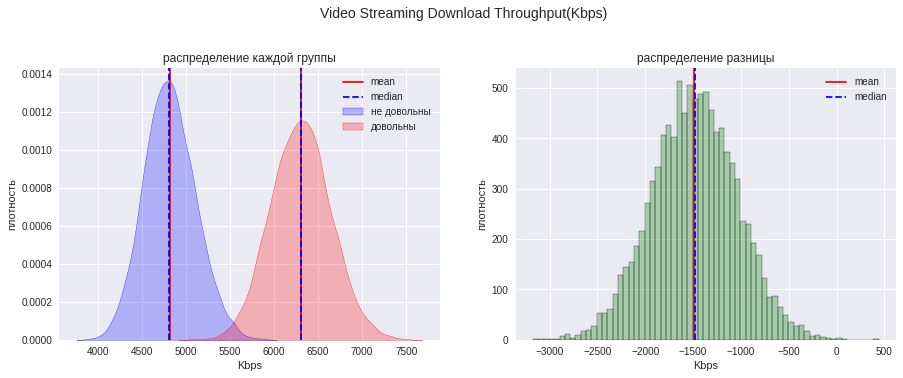

In [ ]:
distr_plot(dt1, dt2, diff, 'Video Streaming Download Throughput(Kbps)', 'Kbps')

На основе имеющихся данных отвергаем нулевую гипотезу. С учетом сильного разброса значений, средняя двух групп отличается значительно. 
Соответственно характеристика **Video Streaming Download Throughput(Kbps)** для двух групп (поставивших 1 и 3 за первый вопрос и у пользователей, поставивших 9 и 10) отличается.

**Гипотеза 4.** Техническая характеристика Web Page Download Throughput не отличается у пользователей, поставивших 1 и 3 за первый вопрос и у пользователей, поставивших 9 и 10.

In [ ]:
data1=df[(df['Q1'] == 1)|(df['Q1'] == 3)]['Web Page Download Throughput(Kbps)']
data2=df[(df['Q1'] == 9)|(df['Q1'] == 10)]['Web Page Download Throughput(Kbps)']

In [ ]:
diff, dt1, dt2 = bootstrap(data1, data2)

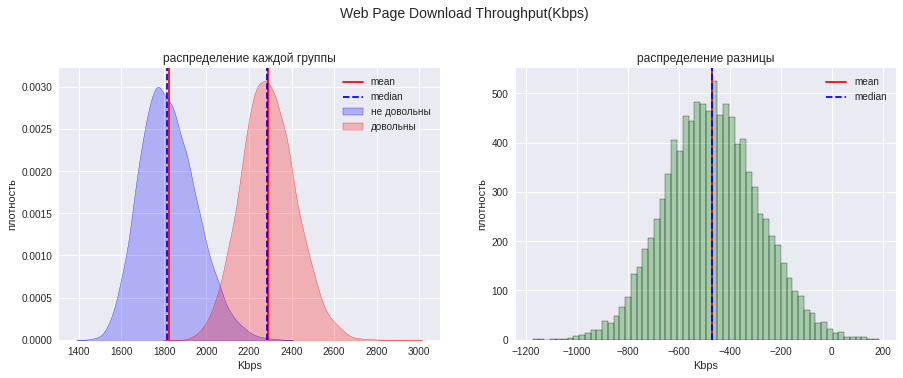

In [ ]:
distr_plot(dt1, dt2, diff, 'Web Page Download Throughput(Kbps)', 'Kbps')

На основе имеющихся данных отвергаем нулевую гипотезу. С учетом сильного разброса значений, средняя двух групп отличается значительно. Соответственно характеристика **Web Page Download Throughput(Kbps)** для двух групп (поставивших 1 и 3 за первый вопрос и у пользователей, поставивших 9 и 10) отличается.

**Гипотеза 5.** Техническая характеристика Downlink Throughput(Kbps) отличается у пользователей, поставивших 1 и 3 за первый вопрос и у пользователей, поставивших 9 и 10.

In [ ]:
data1=df[(df['Q1'] == 1)|(df['Q1'] == 3)]['Downlink Throughput(Kbps)']
data2=df[(df['Q1'] == 9)|(df['Q1'] == 10)]['Downlink Throughput(Kbps)']

In [ ]:
diff, dt1, dt2 = bootstrap(data1, data2)

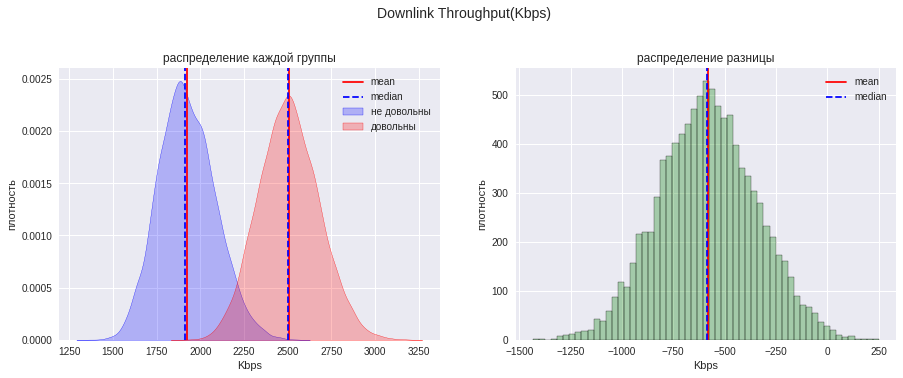

In [ ]:
distr_plot(dt1, dt2, diff, 'Downlink Throughput(Kbps)', 'Kbps')

На основе имеющихся данных отвергаем нулевую гипотезу. С учетом сильного разброса значений, средняя двух групп отличается значительно. Соответственно характеристика **Downlink Throughput(Kbps)** для двух групп (поставивших 1 и 3 за первый вопрос и у пользователей, поставивших 9 и 10) отличается.

**Гипотеза 6.**Техническая характеристика Video Streaming Download Throuhout отличaется у пользователей, поставивших 8 за первый вопрос и у пользователей, поставивших 9.


In [ ]:
data1=df[(df['Q1'] == 8)]['Video Streaming Download Throughput(Kbps)']
data2=df[(df['Q1'] == 9)]['Video Streaming Download Throughput(Kbps)']

In [ ]:
diff, dt1, dt2 = bootstrap(data1, data2)

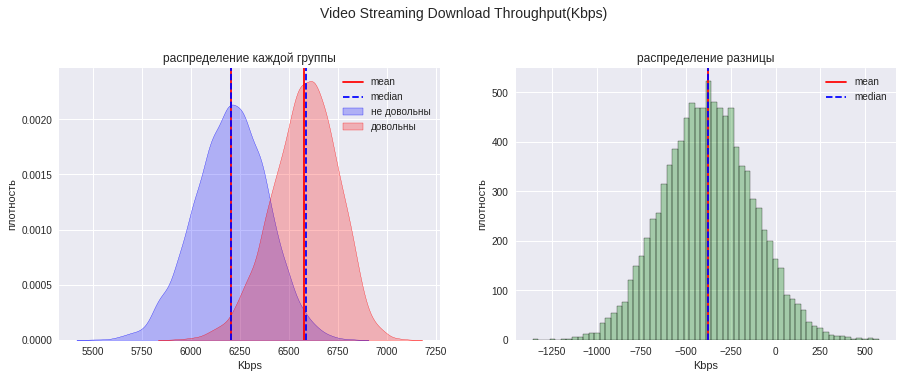

In [ ]:
distr_plot(dt1, dt2, diff, 'Video Streaming Download Throughput(Kbps)', 'Kbps')

На основе имеющихся данных отвергаем нулевую гипотезу. С учетом довольно сильного разброса значений, средняя двух групп отличается. Соответственно характеристика **Video Streaming Download Throughput(Kbps)** для двух групп (поставивших 8 за первый вопрос и у пользователей, поставивших 9) отличается.

**Гипотеза 7.** Техническая характеристика Web Page Download Throughput(Kbps) отличaется у пользователей, поставивших 8 за первый вопрос и у пользователей, поставивших 9.

In [ ]:
data1=df[(df['Q1'] == 8)]['Web Page Download Throughput(Kbps)']
data2=df[(df['Q1'] == 9)]['Web Page Download Throughput(Kbps)']

In [ ]:
diff, dt1, dt2 = bootstrap(data1, data2)

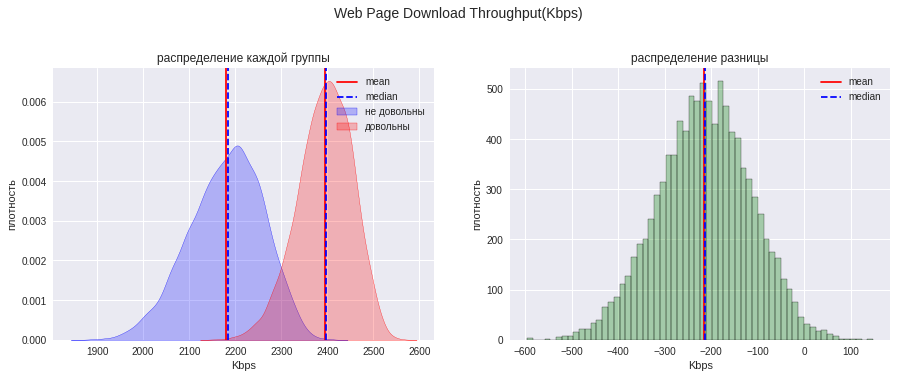

In [ ]:
distr_plot(dt1, dt2, diff, 'Web Page Download Throughput(Kbps)', 'Kbps')

На основе имеющихся данных отвергаем нулевую гипотезу. С учетом малого разброса значений, средняя двух групп практически не отличается. Соответственно характеристика **Web Page Download Throughput(Kbps)** для двух групп (поставивших 8 за первый вопрос и у пользователей, поставивших 9) не отличается.

## Распределение оценок за второй вопрос у пользователей не довольных качеством (оценки ниже 9 за первый вопрос)

In [ ]:
df2 = df.copy()
# df2 = df2.drop(columns = 'Q1_new')

In [ ]:
# Чтобы оценить распределение по второму вопросу, раскроем списки по второму вопросу
df2 = df2.explode('Q2_new')
# Удалим пустые значения во втором вопросе и создадим вспомогательный датасет из них
df3 = df2.dropna(subset = ['Q2_new'])
df3.Q2_new = df3.Q2_new.astype('int64')
df3 = df3.drop(columns = ['Q1_new'])
df3 = df3[df3['Q2_new'] != 0]
df3 = df3.iloc[:, 3:]

In [ ]:
df3.head()

,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),Q2_new
1,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,4
2,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,4
3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,3
4,351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,2
4,351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,3


In [ ]:
dict_q12 = { 0: 'Нет ответа на 2й вопрос',
           1: 'Недозвоны, обрывы при звонках',
           2: 'Время ожидания гудков при звонке',
           3: 'Прохое качество связи в зданиях торговых центрах',
           4: 'Медленный мобильный интернет',
           5: 'Медленная загрузка видео',
           6: 'Затрудняюсь ответить',
           7: 'Свой вариант',
           }

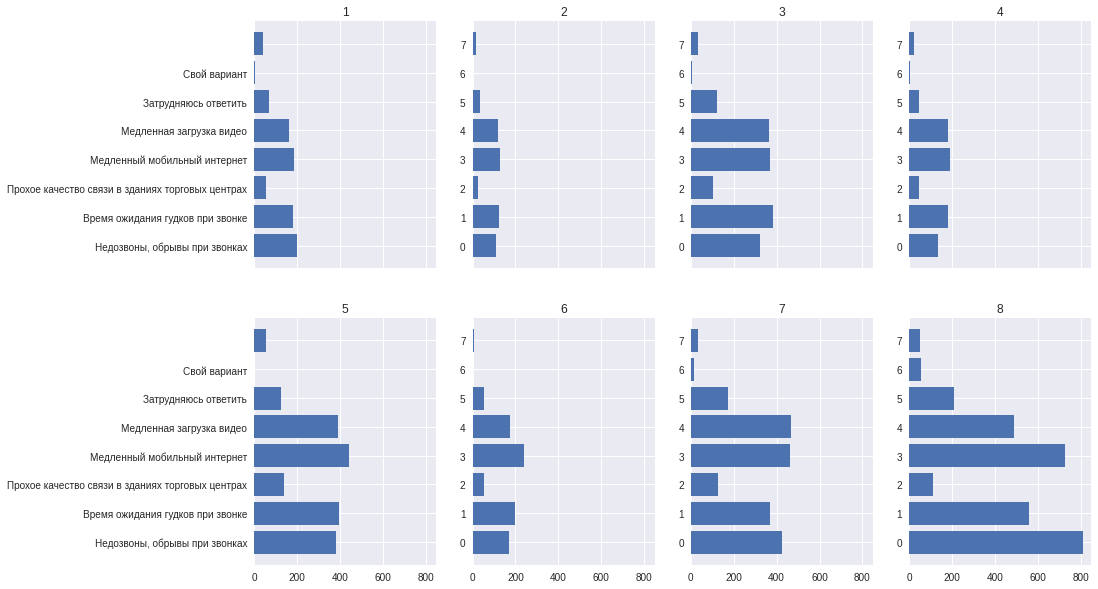

In [ ]:
fig, axes= plt.subplots(2, 4, figsize = (15,10), sharex = True)
ax = axes.ravel()
k = 1
for i in range(8):
  dfq = df2[df2['Q1'] == k ][['Q1', 'Q2_new']].groupby('Q2_new').agg('sum')
  ax[i].barh(dfq.index, dfq.Q1)
  ax[i].set_title(k)
  if i == 0 or i == 4:
    ax[i].set_yticklabels(dict_q12.values())
  k+=1

По графикам видно что клиенты, поставившие оценку 7 и 8 на первый вопрос, активнее всего отвечали на второй вопрос. Данная группа больше всего выбрала ответ на второй вопрос: 

3: 'Прохое качество связи в зданиях торговых центрах'

1: Недозвоны, обрывы при звонках 

4: 'Медленный мобильный интернет'


Также много, кто не ответил на второй вопрос. Можно уточнить именно у данной группы (Ответ 7 и 8 на первый вопрос и нет ответа на второй), что не устраивает.

Данная группа по оценке за первый вопрос ближе всего к группе клиентов удовлетворенных качеством с оценками 9 и 10.

Чтобы значительно улучшить процент довольных клиентов, можно обратить внимание именно на данную группу, чтобы при улучшениях они могли уже повысить оценку с 7 и 8 до 9 и 10.

## Ищем корреляцию между количеством ответов на второй вопрос(по категории) и техническими характеристиками.

In [ ]:
dict_q2 = {
           1: 'Недозвоны, обрывы при звонках',
           2: 'Время ожидания гудков при звонке',
           3: 'Прохое качество связи в зданиях торговых центрах',
           4: 'Медленный мобильный интернет',
           5: 'Медленная загрузка видео',
           6: 'Затрудняюсь ответить',
           7: 'Свой вариант',
           }
colNames = ['description']
df_q2 = pd.DataFrame.from_dict(dict_q2, orient='index', columns=colNames)

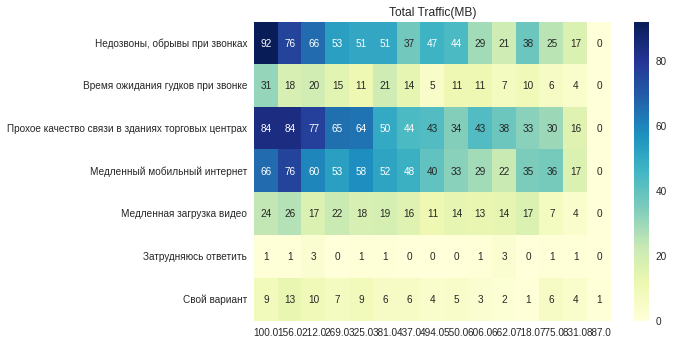

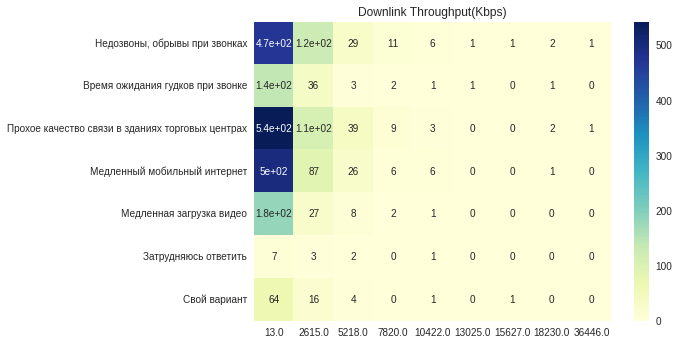

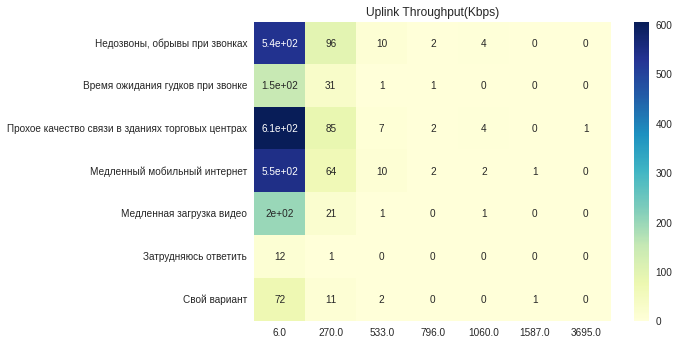

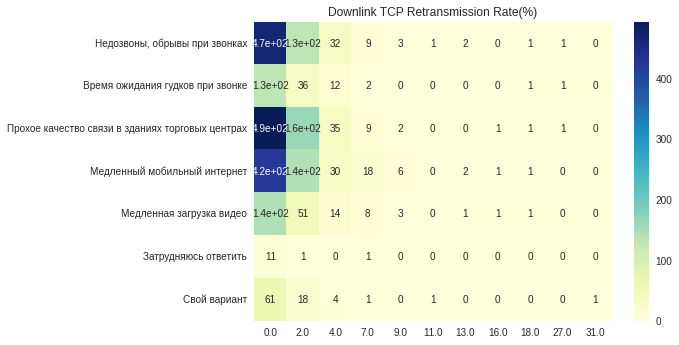

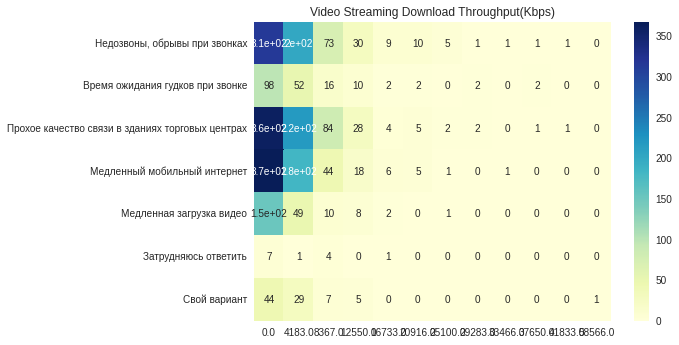

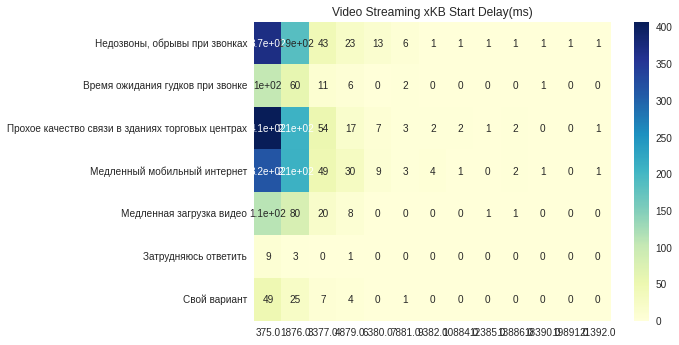

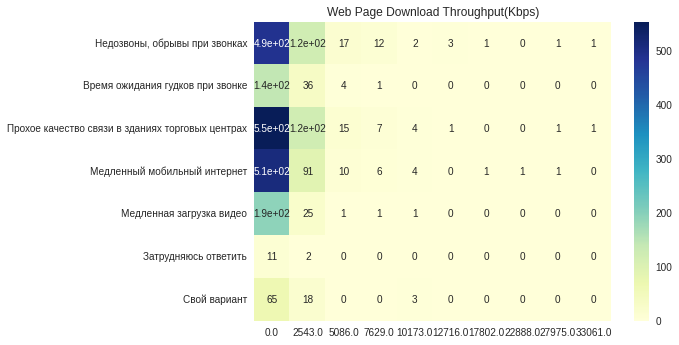

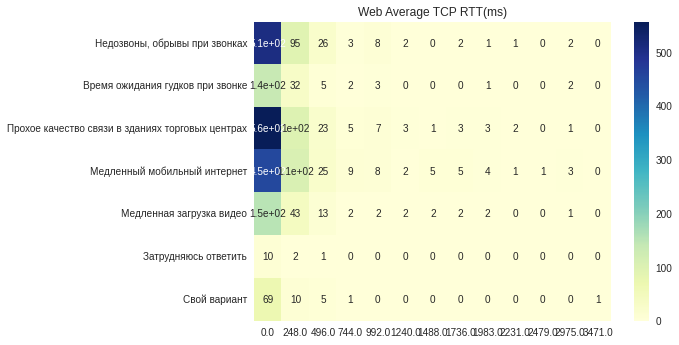

In [ ]:
for i in df3.columns[:-1]:

  # Делим все характеристика на промежутки, так как все они имеют непрерывное распределение. 
  bins = np.linspace(df3[i].min().round().astype('int64'), df3[i].max().round().astype('int64'), 15)
  which_bin = np.digitize(df3[i], bins = bins)
  # Вспомогательный датафрейм(с разделением характеристик на промежутки)
  df3t = df3[[i,	'Q2_new']]
  df3t['which_bin'] = which_bin
  df3t2 = df3t[['Q2_new',	'which_bin',i]].groupby(['Q2_new', 'which_bin']).agg('count').reset_index()
  df3t2 = df3t2.pivot(index='Q2_new', columns='which_bin', values=i).fillna(0)

  ax = plt.axes()
  sns.heatmap(df3t2, annot=True, cmap="YlGnBu", ax = ax)
  ax.set_title(i)
  ax.set_yticklabels(dict_q2.values(), rotation=0) 
  xt=[]
  for j in df3t2.columns:
    xt.append(bins[j-1].round())
  ax.set_xticklabels(xt)
  ax.set_ylabel('')
  ax.set_xlabel('')
  plt.show()


По картам ввидно что большее количество жалоб на
*   плохую связь в торговых центрах(зданиях)
*   недозвоны и обрывы при звонках
*   медленный мобильный интернет

В основном видно корреляцию плохих оценок и всех низких технических характеристик.
Предположительно у клиентов сожет быть минимальный пакет опций, который не соответсвует потребностям. Так как нет разницы в каких-то конкретных характеристиках. Можно предложить таким клиентам немного улучшить пакет опций.

Также вижно что наиболее популярные услуги основываясь на предоставленных данных - это звонки и видео стриминг.
Возможно стоит дополнительно обратить внимание на качество связи в зданиях.

### Статистические гипотезы:

*   Техническая характеристика **Total Traffic(MB)** — объем трафика передачи данных отличается для группы, указавшей "**недозвоны**" в ответе на второй вопрос от довольных клиентов
*   Техническая характеристика **Uplink Throughput(Kbps)**— средняя скорость «от абонента» отличается для группы, указавшей "**плохую связь в торговых центрах(зданиях)**" в ответе на второй вопрос от довольных клиентов
*   Техническая характеристика **Video Streaming Download Throughput(Kbps)** — скорость загрузки потокового видео — средняя скорость «от абонента» отличается для группы, указавшей **"медленный мобильный интернет"** в ответе на второй вопрос от довольных клиентов



# Проверка статистических гипотез по группам на основе ответов на второй вопрос

**Гипотеза 1.** Техническая характеристика Total Traffic(MB) — объем трафика передачи данных не отличается для группы, указавшей 1: 'Недозвоны, обрывы при звонках' в ответе на второй вопрос от довольных клиентов (указавших 9 и 10 на вервый вопрос)

In [ ]:
data1=df2[(df2['Q2_new'] == 1)]['Total Traffic(MB)']
data2=df2[(df2['Q1_new'] == 1)]['Total Traffic(MB)']

In [ ]:
diff, dt1, dt2 = bootstrap(data1, data2)

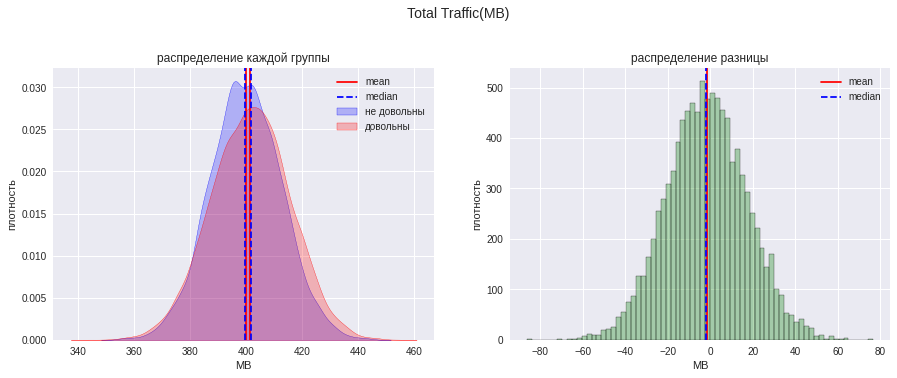

In [ ]:
distr_plot(dt1, dt2, diff, 'Total Traffic(MB)', 'MB')

На основе имеющихся данных принимаем нулевую гипотезу. С учетом малого разброса значений, средняя двух групп практически не отличается. Соответственно характеристика **Total Traffic(MB)** для двух групп (указавшей 1: 'Недозвоны, обрывы при звонках' в ответе на второй вопрос от довольных клиентов (указавших 9 и 10 на вервый вопрос)) не отличается.

**Гипотеза 2.** Техническая характеристика **Downlink Throughput(Kbps)**— средняя скорость «от абонента» не отличается для группы, указавшей "плохую связь в торговых центрах(зданиях)" в ответе на второй вопрос от довольных клиентов

In [ ]:
data1=df2[(df2['Q2_new'] == 3)]['Downlink Throughput(Kbps)']
data2=df2[(df2['Q1_new'] == 1)]['Downlink Throughput(Kbps)']

In [ ]:
diff, dt1, dt2 = bootstrap(data1, data2)

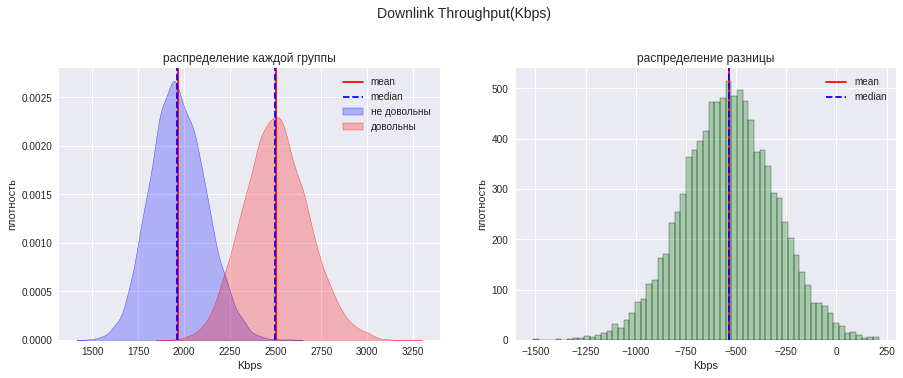

In [ ]:
distr_plot(dt1, dt2, diff, 'Downlink Throughput(Kbps)', 'Kbps')

На основе имеющихся данных отвергаем нулевую гипотезу. С учетом довольно сильного разброса значений, средняя двух групп отличается. Соответственно характеристика **Downlink Throughput(Kbps)** отличается для группы, указавшей "плохую связь в торговых центрах(зданиях)" в ответе на второй вопрос от довольных клиентов.

Гипотеза 3. Техническая характеристика **Video Streaming Download Throughput(Kbps) — скорость загрузки потокового видео** — средняя скорость «от абонента» не отличается для группы, указавшей "медленный мобильный интернет" в ответе на второй вопрос от довольных клиентов

In [ ]:
data1=df2[(df2['Q2_new'] == 4)]['Video Streaming Download Throughput(Kbps)']
data2=df2[(df2['Q1_new'] == 1)]['Video Streaming Download Throughput(Kbps)']

In [ ]:
diff, dt1, dt2 = bootstrap(data1, data2)

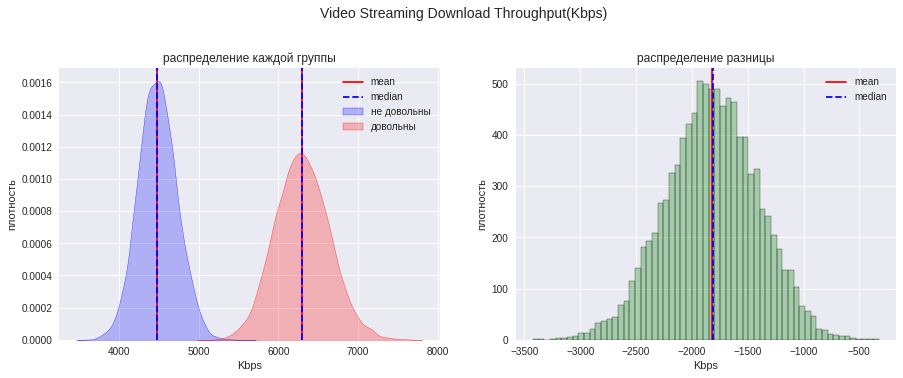

In [ ]:
distr_plot(dt1, dt2, diff, 'Video Streaming Download Throughput(Kbps)', 'Kbps')

На основе имеющихся данных отвергаем нулевую гипотезу. С учетом довольно сильного разброса значений, средняя двух групп отличается. Соответственно характеристика **Video Streaming Download Throughput(Kbps)** отличается для группы, указавшей "медленный мобильный интернет" в ответе на второй вопрос от довольных клиентов.

# Насколько полезен каждый признак (технические характеристики)


Используем одномерные статистики, чтобы проверить наличие статистически значимой взаимосвязи между каждым признаком и зависимой переменной (ответом на вопрос 1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

select = SelectKBest(k = 1)

In [ ]:
df_for_select = df.iloc[:, 3:-1]

In [ ]:
X_train, X_test, y_train, x_test = train_test_split(df_for_select.iloc[:,:-1], df_for_select['Q1_new'], test_size = 0.3)

In [ ]:
X_train.shape

(2143, 8)

In [ ]:
select.fit(X_train, y_train) 

SelectKBest(k=1)

In [ ]:
transformed = select.transform(X_train)

In [ ]:
# Осталось 1 признак
transformed.shape

(2143, 1)

[False False False False  True False False False]


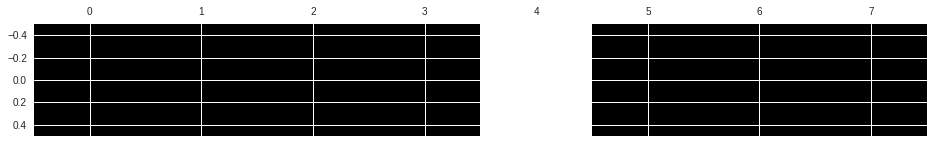

In [ ]:
# Отобран 1 признак
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray')

In [ ]:
df_for_select.columns[[4]]

Index(['Video Streaming Download Throughput(Kbps)'], dtype='object')

Самым важным с точки зрения влияния на целевую переменную (ответ на первый вопрос - доволен/недоволен) является 'Video Streaming Download Throughput(Kbps)

# Общий вывод:

По результатам тестов подтвердились альтернативные гипотезы, что оценка за качество услуг зависит от технических характеристик. Для кдиентов, недовольных сервисом, характеристики заметно ниже.

А также на основе статистического теста подтвердились по некоторым характеристикам альтернативные гипотезы о разнице технических характеристик для клиентов по-разному ответивших на второй вопрос.

### Рекомендации на основе анализа: 
1. В первую очередь улучшить характеристики для группы, поставившие на первый вопрос оценку 8. Поскольку данная группа активнее всего отвечала на второй вопрос, а также ближе всего к положительный оценкам, то при улучшении показателей для данной группы процент удовлетворенных клиентов увеличится.

  Следует обратить внимание на характеристики, распределение которых заметно отличается от группы довольных пользователей: **Video Streaming Download Throughput(Kbps) и Web Page Download Throughput(Kbps)**


2. Также нужно обратить внимание на пользователей поставивших оценки 1 и 3 на первый вопрос, так как это самые популярные причины ответов. Чем больше пользователей из этой группы будут довольны, тем больше будет удовлетворенных клиентов.

  Следует обратить внимание на характеристики, распределение которых заметно отличается от группы довольных пользователей: **Video Streaming Download Throughput(Kbps), Web Page Download Throughput(Kbps) и Downlink Throughput(Kbps)**

3. Также нужно улучшить характеристики соответственно
  для группы клиентов, указавших на второй вопрос **"плохую связь в торговых центрах(зданиях)"- улучшить Downlink Throughput(Kbps)**

  для группы клиентов, указавших на второй вопрос **"медленный мобильный интернет"- улучшить Video Streaming Download Throughput(Kbps)**

  Так как статистический тест показал значимую разницу для данных групп по сравнению с довольными клиентами.

4. В первую очередь рекомендуется обратить внимание на 
  
  **Downlink Throughput(Kbps) — средняя скорость «к абоненту»** , 

  так как есть заметная корреляция между данной характеристикой и 

  **Video Streaming Download Throughput(Kbps) — скорость загрузки потокового видео** 

  **Web Page Download Throughput(Kbps) — скорость загрузки web-страниц через браузер**

5. Самой важной с точки зрения влияния на оценку является **Video Streaming Download Throughput(Kbps) — скорость загрузки потокового видео**



